# Data Visualization

## References
* https://stackoverflow.com/questions/47343838/how-to-change-column-names-in-pandas-dataframe-using-a-list-of-names

In [68]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [69]:
# Import dataset
wardrobe_df = pd.read_csv('Resources/wardrobedata.csv')
wardrobe_df.head()

,Item,Total Wears,Cost per Wear,Wears per Month,Date Acquired,Cost,Source,Repairs/Tailoring,Color,Type,...,Wears (10/2019),Wears (9/2019),Wears (8/2019),Wears (7/2019),Wears (6/2019),Wears (5/2019),Wears (4/2019),Wears (3/2019),Wears (2/2019),Wears (1/2019)
0,Brian's White Buttonup LS Shirt,5.0,0.000000,1.595745,2020-08-09,0,Secondhand,0.0,cream/white/tan,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cream Turtleneck LS Shirt,12.0,0.333333,0.519481,2018-12-19,4,Secondhand,0.0,cream/white/tan,Tops,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Tie Dye Mineo LS Shirt,5.0,7.000000,0.555556,2020-02-15,35,Fast Fashion,0.0,multi,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Forest Green Silk LS Shirt,10.0,2.300000,0.769231,2019-10-18,23,Secondhand,0.0,green,Tops,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grey Heather LS Shirt,23.0,0.652174,0.660287,2018-01-01,15,Fast Fashion,0.0,grey,Tops,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0


## Acquisition Types

In [70]:
# Fix discrepances in source labels
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Second one purchased 9/4/19', 'Secondhand')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Second', 'Secondhand')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Slow fashion', 'Slow Fashion')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('Fair Trade', 'Slow Fashion')
wardrobe_df['Source'] = wardrobe_df['Source'].replace('New', 'Fast Fashion')

source_count = wardrobe_df[['Source', 'Item']].groupby('Source').count()
source_count

,Item
Source,
Fast Fashion,52
Gift,10
Hand-me-down,10
Secondhand,32
Slow Fashion,25


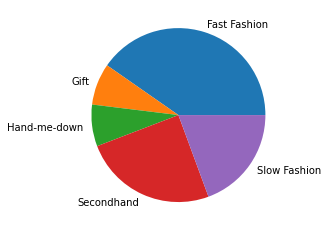

In [71]:
source_count.plot(kind='pie', y='Item', legend=None)
plt.ylabel('')
plt.show()

## Average Cost per Wear by Category

In [72]:
cpw_category = wardrobe_df[['Type', 'Category', 'Cost per Wear']].groupby(['Type', 'Category']).mean()
cpw_category

Cost per Wear
Type      Category                  
Bottoms   jeans             1.839804
          leggings          4.805836
          pants             7.171043
          shorts           12.083333
          skirt             1.387037
Outerwear blazer            6.473333
          cardigan          4.658929
          coat/jacket       4.074284
          sweater           2.970933
Shoes     boots            12.017881
          flats            13.995671
          heels             7.500000
          sandals           6.236392
          sneakers          9.678208
Tops      shirt             4.359611

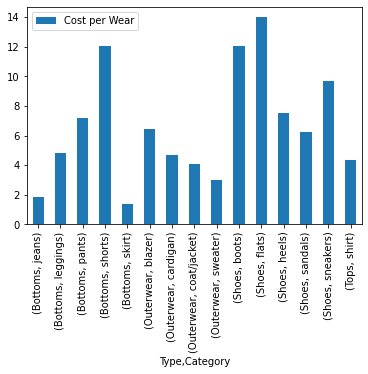

In [73]:
cpw_category.plot(kind='bar')
plt.show()

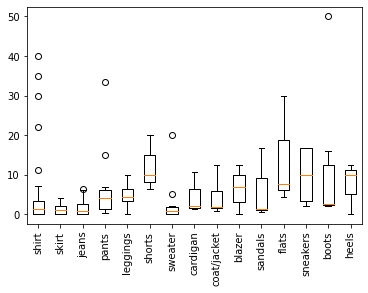

In [100]:
# Same date but in a boxplot
types = wardrobe_df['Category'].unique()
plt.boxplot([wardrobe_df['Cost per Wear'].loc[wardrobe_df['Category'] == cat] for cat in categories])
plt.xticks(range(1, (len(types) + 1)), types, rotation='vertical')
plt.show()

## Average Wears per Month by Category

In [75]:
wpm_category = wardrobe_df[['Type', 'Category', 'Wears per Month']].groupby(['Type', 'Category']).mean()
wpm_category

Wears per Month
Type      Category                    
Bottoms   jeans               2.052793
          leggings            0.520911
          pants               1.783320
          shorts              0.038670
          skirt               0.411359
Outerwear blazer              0.595092
          cardigan            1.922418
          coat/jacket         1.258899
          sweater             1.447203
Shoes     boots               1.589110
          flats               1.541484
          heels               0.075643
          sandals             1.154652
          sneakers            1.770453
Tops      shirt               0.702433

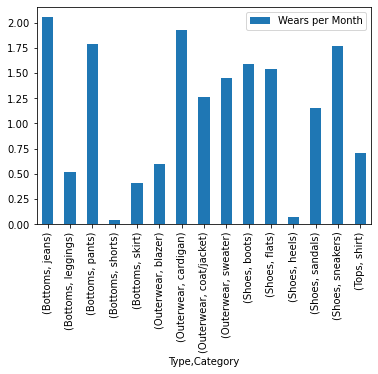

In [76]:
wpm_category.plot(kind='bar')
plt.show()

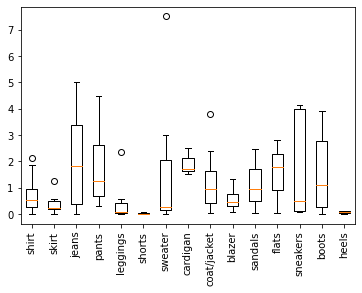

In [101]:
# Same date but in a boxplot
types = wardrobe_df['Category'].unique()
plt.boxplot([wardrobe_df['Wears per Month'].loc[wardrobe_df['Category'] == cat] for cat in categories])
plt.xticks(range(1, (len(types) + 1)), types, rotation='vertical')
plt.show()

## Average Wears per Month by Category (line graphs)

In [115]:
# Edit column names so that they are dates only 

# Determine columns that include wear counts
wear_cols = []
for col_name in wardrobe_df.columns:
    if 'Wears (' in col_name:
        wear_cols.append(col_name)

# Pull dates from column names
date_cols = []
for col_name in wear_cols:
    name_1 = col_name.replace('(', ',')
    name_2 = name_1.replace(')', ',')
    split_col = name_2.split(',')
    date_cols.append(split_col[1])

# Replace names in dataframe
wardrobe_df = wardrobe_df.rename(columns=dict(zip(wear_cols, date_cols)))
wardrobe_df

,Item,Total Wears,Cost per Wear,Wears per Month,Date Acquired,Cost,Source,Repairs/Tailoring,Color,Type,...,10/2019,9/2019,8/2019,7/2019,6/2019,5/2019,4/2019,3/2019,2/2019,1/2019
0,Brian's White Buttonup LS Shirt,5.0,0.000000,1.595745,2020-08-09,0,Secondhand,0.0,cream/white/tan,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cream Turtleneck LS Shirt,12.0,0.333333,0.519481,2018-12-19,4,Secondhand,0.0,cream/white/tan,Tops,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Tie Dye Mineo LS Shirt,5.0,7.000000,0.555556,2020-02-15,35,Fast Fashion,0.0,multi,Tops,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Forest Green Silk LS Shirt,10.0,2.300000,0.769231,2019-10-18,23,Secondhand,0.0,green,Tops,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grey Heather LS Shirt,23.0,0.652174,0.660287,2018-01-01,15,Fast Fashion,0.0,grey,Tops,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Black Suede Knee High Boots,5.0,16.000000,0.059856,2014-01-01,80,Fast Fashion,0.0,NaN,Shoes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,Black Leather Sandals,76.0,0.657895,2.464865,2018-05-01,50,Fast Fashion,0.0,NaN,Shoes,...,3.0,10.0,9.0,8.0,11.0,16.0,10.0,3.0,5.0,1.0
126,Brown Clarks Flipflops,3.0,16.666667,0.031348,2013-01-01,50,Fast Fashion,0.0,NaN,Shoes,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,New Balance Sneakers,3.0,16.666667,0.086124,2018-01-01,50,Fast Fashion,0.0,NaN,Shoes,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Purchases per Year